# Explore here

**API PROJECT**


In [1]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()

import os

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")



In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

artist_id = '6fOMl44jA4Sp5b9PpYCkzz'

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id,client_secret=client_secret))
results = spotify.artist_top_tracks(artist_id)

In [4]:
songs=[]
popularity=[]
duration=[]

for track in results['tracks'][:10]:
    print('track    : ' + track['name'])
    songs.append(track['name'])
    popularity.append(track['popularity'])
    duration.append(track['duration_ms']/(1000*60)%60)

track    : Let You Down
track    : The Search
track    : Lie
track    : HOPE
track    : HAPPY
track    : When I Grow Up
track    : If You Want Love
track    : Time
track    : RUNNING
track    : Paralyzed


In [5]:
df = pd.DataFrame()

df['songs'] = songs
df['popularity'] = popularity
df['duration'] = duration

In [6]:
df

,songs,popularity,duration
0,Let You Down,76,3.535333
1,The Search,71,4.134217
2,Lie,72,3.486883
3,HOPE,67,4.407883
4,HAPPY,70,4.044850
5,When I Grow Up,69,3.280000
6,If You Want Love,69,3.323100
7,Time,67,4.007133
8,RUNNING,66,4.225533
9,Paralyzed,66,4.507550


In [7]:
df_ascending = df.sort_values(by='popularity', ascending=False)
df_ascending

,songs,popularity,duration
0,Let You Down,76,3.535333
2,Lie,72,3.486883
1,The Search,71,4.134217
4,HAPPY,70,4.044850
5,When I Grow Up,69,3.280000
6,If You Want Love,69,3.323100
3,HOPE,67,4.407883
7,Time,67,4.007133
8,RUNNING,66,4.225533
9,Paralyzed,66,4.507550


In [8]:
df_ascending.head(3)

,songs,popularity,duration
0,Let You Down,76,3.535333
2,Lie,72,3.486883
1,The Search,71,4.134217


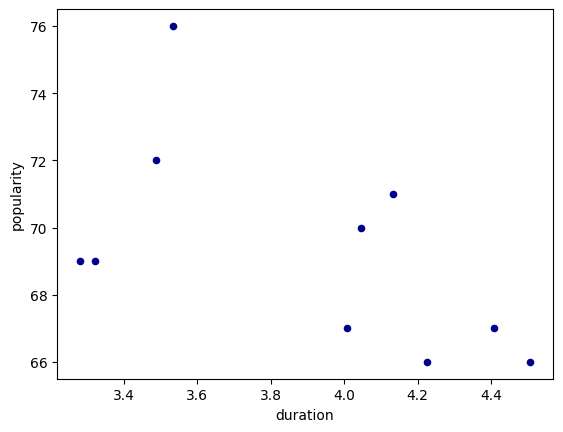

In [9]:
Popularity_duration_tracks = df.plot.scatter(x='duration',
                      y='popularity',
                      c='DarkBlue'
                      )

We can see that the most popular song of this artist, its duration is around 3.53 minutes, while the less popular is almost 5 minutes long. So in conclusion there is no relation between the duration of a song with its popularity, so it is not essential for it to be popular.

In [7]:
from sqlalchemy import create_engine
import pandas as pd

connection_string = f"postgresql://{"access_token": "BQBkEv4iGWYgj76c8YSiS-mVz1OfYiOhQs10VELcjWFGrAZGtaqRCTBuyBqauAod-sNXpDeVL0ZVfVkoyaCBX3PKp4_QdmbRBHaZAW_GOUEvNIJN38c", "token_type": "Bearer", "expires_in": 3600, "expires_at": 1735229809}"
engine = create_engine(connection_string).execution_options(autocommit=True)
engine.connect()

df.to_sql(
    name='SpotifyTracks',
    con=engine,
    if_exists='append',
    index=False,
)

SyntaxError: f-string: expecting '}' (345253066.py, line 4)